# 1. Introduction to Dataset Exploration

In this section, we will:

Load the African Wildlife dataset.

Explore the dataset structure.

Visualize sample images with bounding boxes.

### Function to visualize images with bounding boxes

In [2]:


# Import libraries
import os
import cv2
import matplotlib.pyplot as plt

# Define dataset paths
train_image_dir = "data/african_wildlife/train/images"
train_label_dir = "data/african_wildlife/train/labels"


In [3]:
# Function to visualize images with bounding boxes
def plot_image_with_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    height, width, _ = image.shape
    
    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, w, h = map(float, line.split())
            # Convert YOLO format to pixel coordinates
            x_center *= width
            y_center *= height
            w *= width
            h *= height
            x_min = int(x_center - w / 2)
            y_min = int(y_center - h / 2)
            x_max = int(x_center + w / 2)
            y_max = int(y_center + h / 2)
            
            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    
    plt.imshow(image)
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis("off")
    plt.show()

### Visualize a few samples

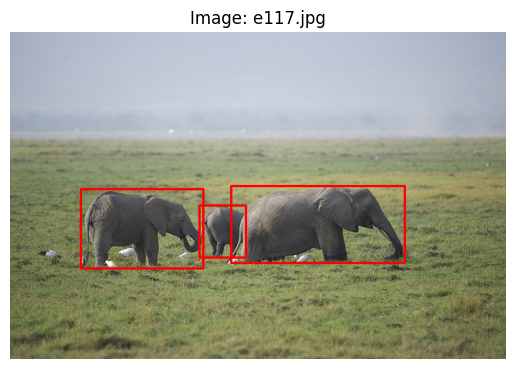

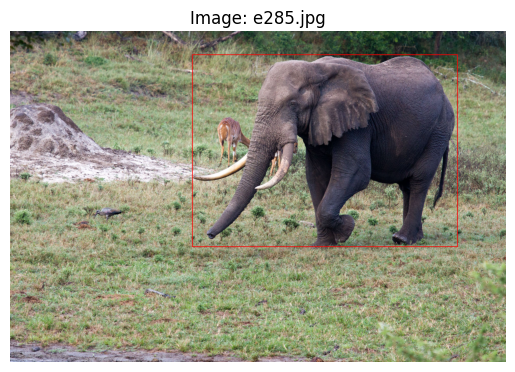

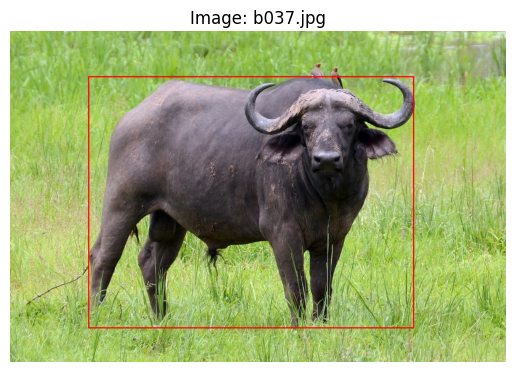

In [4]:
sample_images = os.listdir(train_image_dir)[:3]  # First 3 images
for img in sample_images:
    img_path = os.path.join(train_image_dir, img)
    label_path = os.path.join(train_label_dir, img.replace(".jpg", ".txt"))
    plot_image_with_boxes(img_path, label_path)

# 2. Dataset Verification

We need to ensure that:

Every image has a corresponding label file.

The annotations are correct.

In [5]:
import os
# Verify dataset integrity
def verify_dataset(image_dir, label_dir):
    images = set(os.listdir(image_dir))
    labels = set(os.listdir(label_dir))
    
    missing_labels = []
    for img in images:
        label_file = img.replace(".jpg", ".txt")
        if label_file not in labels:
            missing_labels.append(img)
    
    if missing_labels:
        print(f"Missing labels for {len(missing_labels)} images.")
    else:
        print("All images have corresponding labels.")

        train_image_dir = "data/african_wildlife/train/images"
train_label_dir = "data/african_wildlife/train/labels"

verify_dataset(train_image_dir, train_label_dir)

All images have corresponding labels.


# 3. Dataset Preprocessing
In this section, we will:

Resize images to a consistent resolution (e.g., 640x640).

Normalize pixel values.

In [7]:
import os
import cv2

# Resize images and save to a new directory
def resize_images(image_dir, output_dir, size=(640, 640)):
    os.makedirs(output_dir, exist_ok=True)
    for img in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img)
        image = cv2.imread(img_path)
        resized_image = cv2.resize(image, size)
        cv2.imwrite(os.path.join(output_dir, img), resized_image)

# Resize training images
resize_images(train_image_dir, "data/african_wildlife/train/images_resized")


### train

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  

# Train the model
results = model.train(data="data.yaml", epochs=50, imgsz=640, batch=16, name="african_wildlife_yolov8")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/sam/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.85 🚀 Python-3.13.2 torch-2.6.0+cu124 CPU (Intel Core(TM) i5-3320M 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=african_wildlife_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou

100%|██████████| 755k/755k [00:01<00:00, 497kB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

[W307 13:09:25.705505609 NNPACK.cpp:62] Could not initialize NNPACK! Reason: Unsupported hardware.


Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/sam/Desktop/sammy/wildlife-conservation-system/data/african_wildlife/train/labels... 1200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1200/1200 [00:20<00:00, 58.26it/s] 

train: New cache created: /home/sam/Desktop/sammy/wildlife-conservation-system/data/african_wildlife/train/labels.cache



val: Scanning /home/sam/Desktop/sammy/wildlife-conservation-system/data/african_wildlife/val/labels... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:03<00:00, 96.80it/s] 

val: New cache created: /home/sam/Desktop/sammy/wildlife-conservation-system/data/african_wildlife/val/labels.cache


Plotting labels to /home/sam/Desktop/sammy/wildlife-conservation-system/runs/detect/african_wildlife_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /home/sam/Desktop/sammy/wildlife-conservation-system/runs/detect/african_wildlife_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/75 [00:00<?, ?it/s]

# 4. Model Training
In this section, we will:

Load the preprocessed dataset.

Train a YOLOv8 model on the African Wildlife dataset.

# 5. Model Evaluation
In this section, we will:

Evaluate the trained model on the validation set.

Compute key metrics like mAP, precision, and recall.

In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO("C:/Users/mophi/Desktop/wildlife-conservation-system/yolov8n.pt")
# Evaluate on the validation set
metrics = model.val()  

# Print key metrics
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")
print(f"Precision: {metrics.box.precision}")
print(f"Recall: {metrics.box.recall}")

# 6. Testing and Deployment
In this section, we will:

Test the model on new images.

Export the model for deployment.

In [ ]:
# Test on new images
test_images = ["path/to/test_image1.jpg", "path/to/test_image2.jpg"]  

for img_path in test_images:
    best_model = YOLO("yolov8n.pt")
    results = best_model(img_path)
    for result in results:
        result.show()  
        print(f"Detected objects: {result.boxes.cls}")  

# Export the model to ONNX format
best_model.export(format="onnx")
print("Model exported to ONNX format for deployment.")